In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
1 / (1.2*1e-12 * (0.18 * 1e10) ** 2)

2.57201646090535e-07

# Define some functions for unit conversion
In this notebook, the unit is 
fs, um, keV

In [2]:
# Define some functions 
hbar = 0.0006582119514  # This is the reduced planck constant in keV/fs

c = 299792458. * 1e-9  # The speed of light in um / fs


def kev_to_wavevec_length(energy):
    return energy / hbar / c


def intensity_fwhm_to_field_sigma(fwhm):
    return fwhm / (2. * np.sqrt(2 * np.log(2))) * np.sqrt(2)

# Define parameters

In [3]:
pulse_energy = 0.001  # keV   
wavevec = kev_to_wavevec_length(pulse_energy)  # 2pi / wavelength

t_res = np.pi * 2 / wavevec / 10  # sample 10 points per oscillation 

pulse_duration = 10  # fs, i.e., the FWHM of the gaussian pulse intensity profile as a function of time
pulse_sigma = intensity_fwhm_to_field_sigma(
    fwhm=pulse_duration)  # Since we want to plot the oscillation, we needs to use the electric field

# Define the data holder for rendering
time_axis = np.linspace(start=-2 * pulse_duration, stop=2 * pulse_duration, num=int(4 * pulse_duration / t_res))

# Get the wave
waveform = np.exp(-time_axis ** 2 / pulse_sigma ** 2 / 2.) * np.cos(time_axis * c * wavevec)

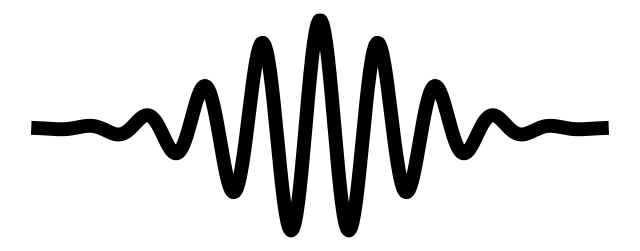

In [4]:
fig, axis = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(8)

axis.plot(time_axis, waveform, color='k', linestyle='-', linewidth=10,)
axis.set_axis_off()

plt.savefig("./wave_black.png", dpi=300, bbox_inches='tight',  transparent=True)
plt.show()

In [1]:
30 * 0.015 / 0.28

1.6071428571428568

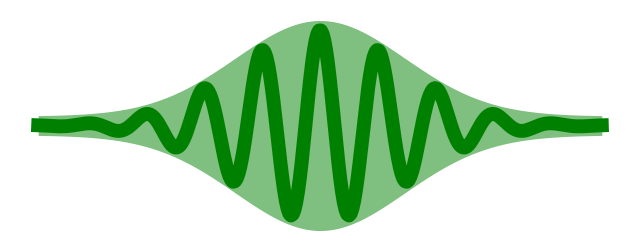

In [7]:
fig, axis = plt.subplots(ncols=1, nrows=1)
fig.set_figheight(3)
fig.set_figwidth(8)

axis.fill_between(x=time_axis,
                  y1=np.exp(-time_axis ** 2 / pulse_sigma ** 2 / 2.) + 0.1,
                  y2=-np.exp(-time_axis ** 2 / pulse_sigma ** 2 / 2.) - 0.1,
                  color='g', linestyle='-', linewidth=0, 
                  alpha=0.5)
axis.plot(time_axis, waveform, color='g', linestyle='-', linewidth=10,)
axis.set_axis_off()

plt.savefig("./wave_green_fill.png", dpi=300, bbox_inches='tight',  transparent=True)
plt.show()